# File to do Porto Taxi Trajectory Similiarity

### Step 1

Open the code/global_variables.py file, [or just click here](global_variables.py). And edit the values to fit the given experiment, the name of the chosen subset ("subset-*size*) and the size of the subset. As well as the coordinates of the geographical area.


### Step 2

Make sure you have the needed files/folders for the chosen subset.
 - in data/raw_data there must be a .csv file with the subset of the chosen size. If not, it must be uploaded.
 - in data/chosen_data there must be a folder with the same name as global_variables.CHOSEN_SUBSET_NAME. If not, create this empty folder.
 - in data/hashed_data there must be a folder with the same name as global_variables.CHOSEN_SUBSET_NAME. If not, create this empty folder.
 - in data there must be a folder called bus_data. If not, create this empty folder.

### Step 3

Run the cells in [code/porto-data.ipynb](porto-data.ipynb), or just run the cell below.
This will load the data from the chosen subset into the folder data/chosen_data/subset-'size', each row in the dataset is written in its own text file. It also creates a META-file which contains the name of all the text files in the subset.

(Might requires to install nbformat: "pip install nbformat")

In [1]:
#%run "porto-data.ipynb"

### Step 4

Run the cells in code/bus-data.ipynb, or just run the cell below. This will load the bus data into the folder data/bus_data, each bus-route is written in its own file. It also creted a META-file which containt the name of all the text files in the subset.

In [2]:
#%run "bus-data.ipynb"

### Step 5

Run the cells in [code/lsh-grid.ipynb](lsh-grid.ipynb), or just run the cell below. This will represent each of the rows/trajectories as an hash, and create a text file for each hashed trajectory in the folder data/hashed_data/subset-'size', as well as a META file.

In [3]:
#%run "lsh-grid.ipynb"

### Step 6
Calculate similarities by running the following code

In [4]:
#%run "similarities-only-grid.ipynb"

### Step 7

Run the code below to see the clustering of the trajectories. Decide the number of clusters you want by updating number_of_trajectories.

In [5]:
#Change this to the number of clusters you want (if wanted number is more than 30: update in def plot_clusters() in hierarchical_clustering.py)
#number_of_clusters = 10

In [6]:
#from experiments.hierarchical_clustering import HCA
#from experiments import davies_bouldin as DB 
#from sklearn import metrics as mcs

#import global_variables

# Porto Grid similarities
#TODO: remove city
#PortoGrid = HCA("Porto", f"../code/experiments/similarities/grid_porto-{global_variables.CHOSEN_SUBSET_NAME}.csv", number_of_clusters )
#print(PortoGrid.clusters)
#PortoGrid.plot_clusters("Porto - Grid")
#clusters_dict = PortoGrid.get_cluster_dictionary()
#print(clusters_dict)

/cluster/home/andrehva/.conda/envs/masteroppgave/lib/python3.12/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/cluster/home/andrehva/.conda/envs/masteroppgave/lib/python3.12/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/cluster/home/andrehva/.conda/envs/masteroppgave/lib/python3.12/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/cluster/home/andrehva/.conda/envs/masteroppgave/lib/python3.12/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The sym

Best number of clusters is: 12


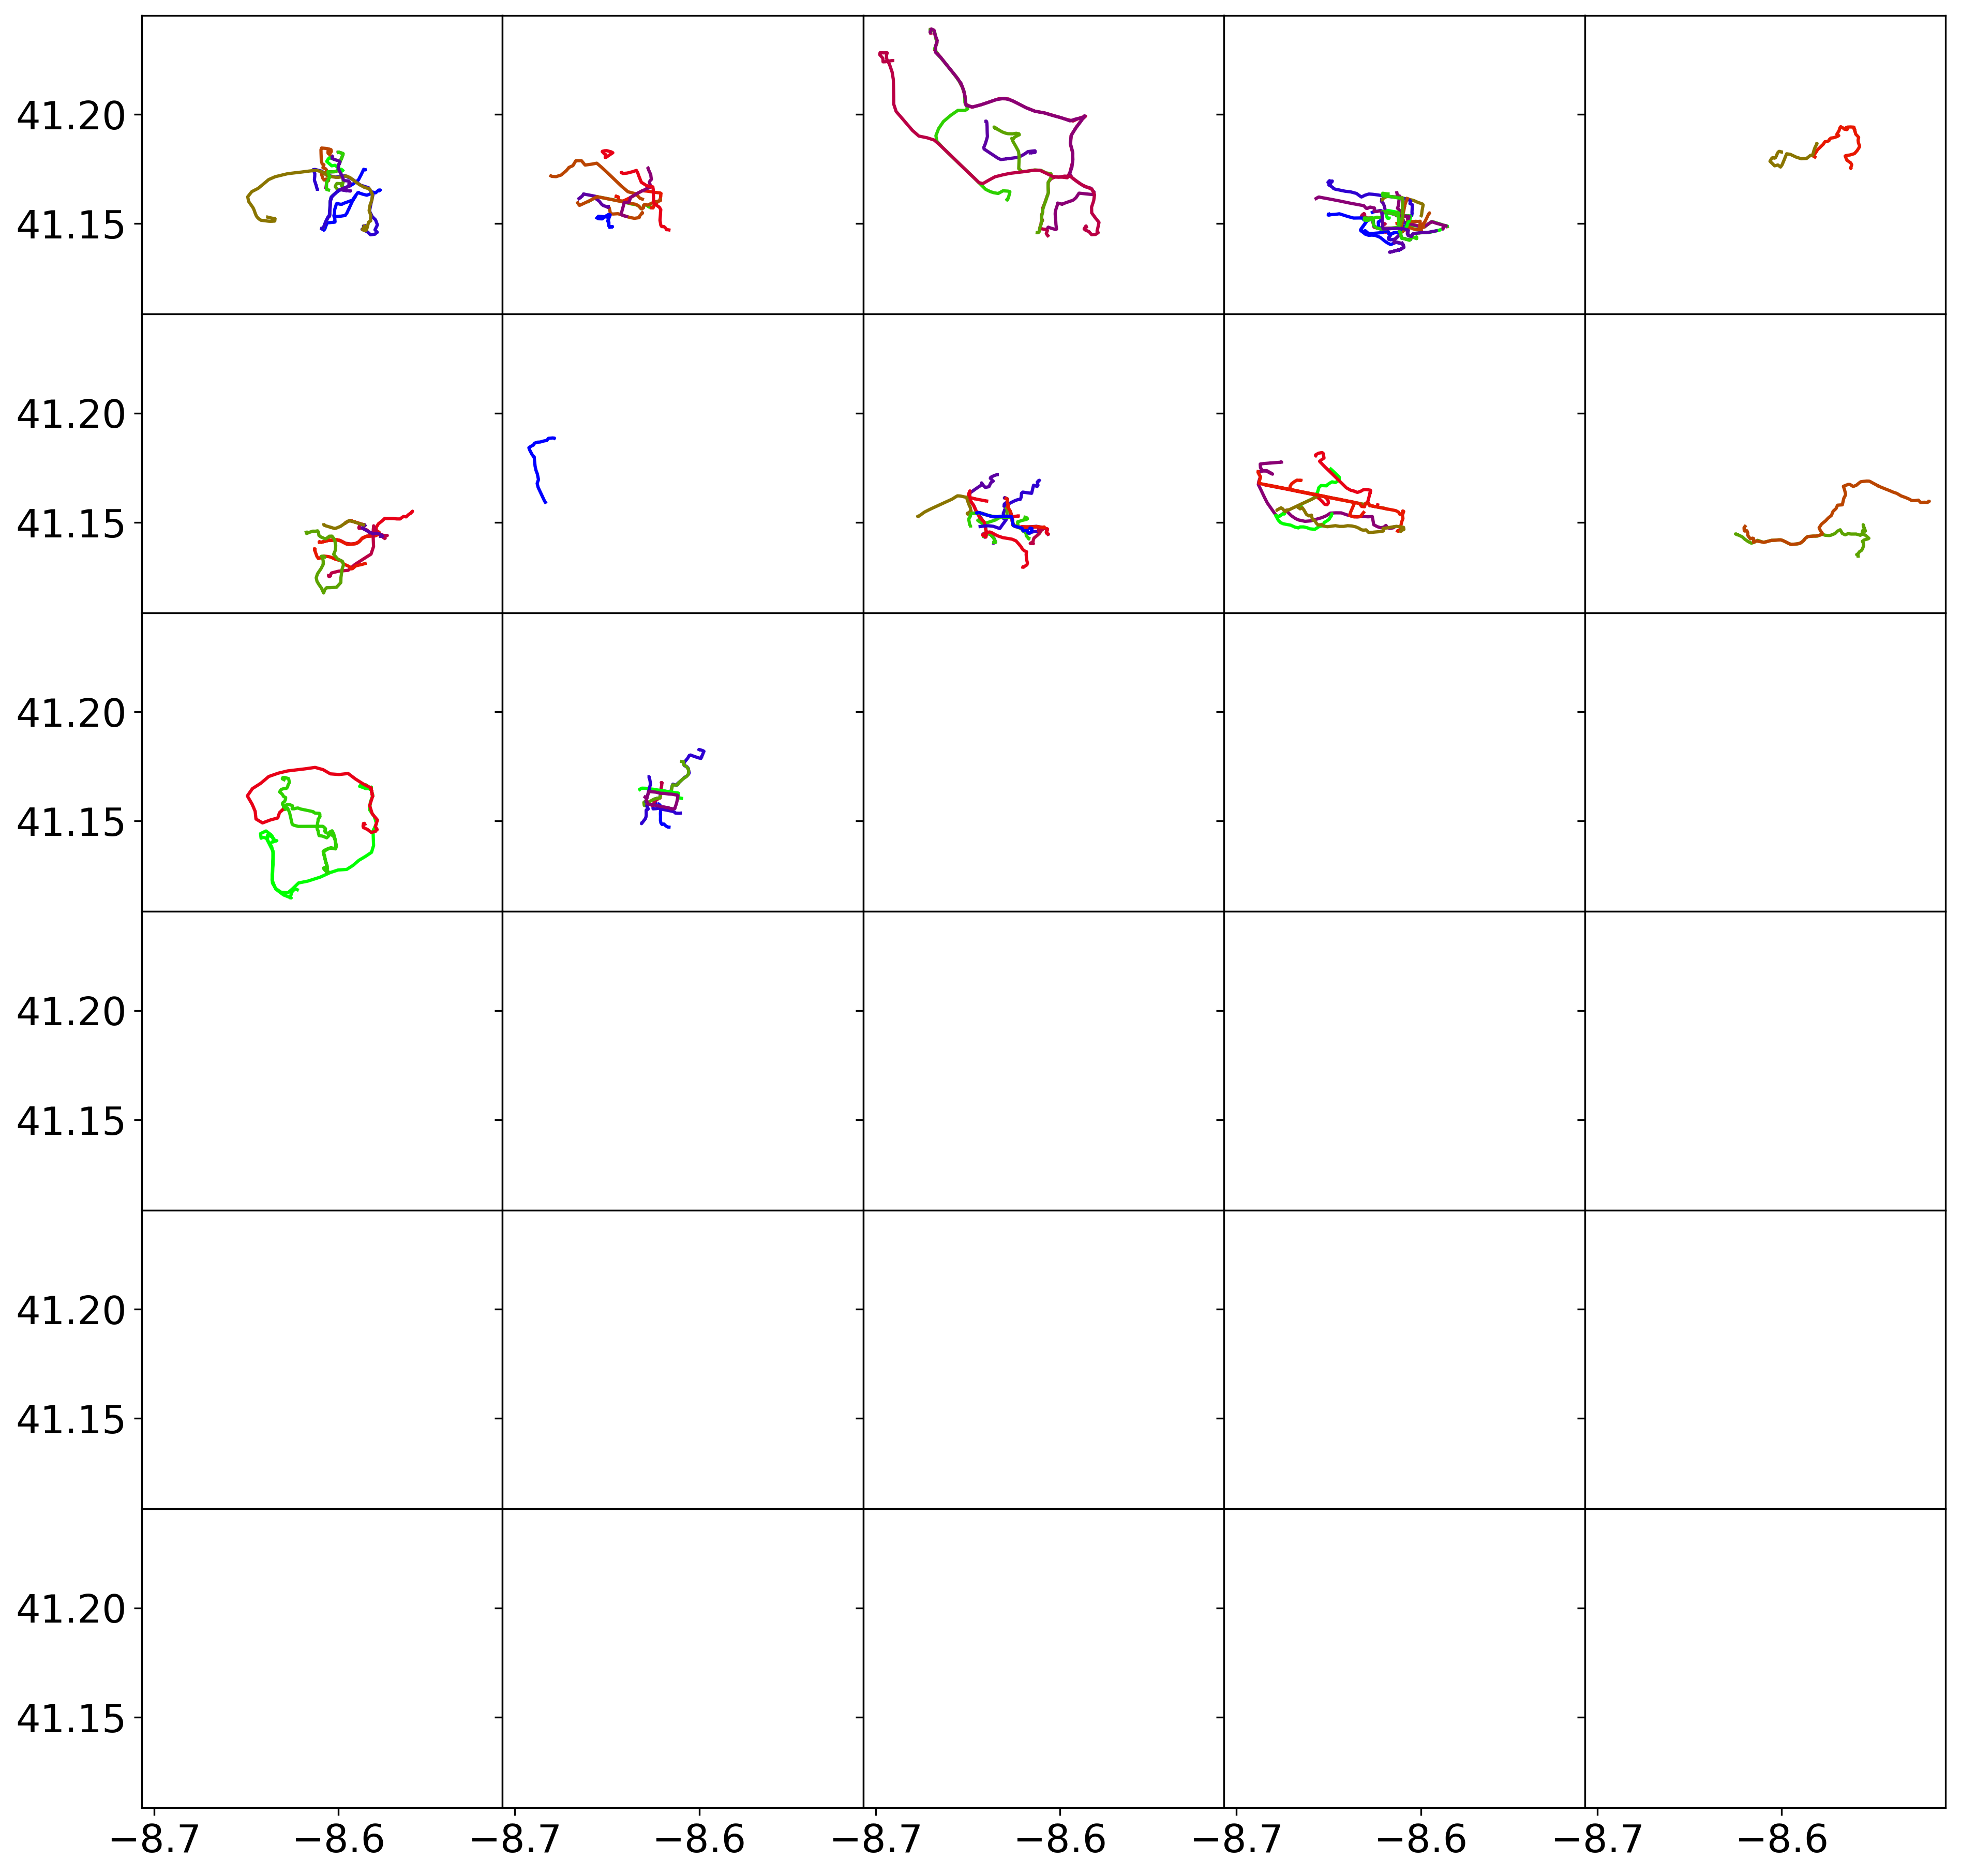

TEST123
['P_AAAA', 'P_AAAB', 'P_AAAC', 'P_AAAD', 'P_AAAE', 'P_AAAF', 'P_AAAG', 'P_AAAH', 'P_AAAI', 'P_AAAJ', 'P_AAAK', 'P_AAAL', 'P_AAAM', 'P_AAAN', 'P_AAAO', 'P_AAAP', 'P_AAAQ', 'P_AAAR', 'P_AAAS', 'P_AAAT', 'P_AAAU', 'P_AAAV', 'P_AAAW', 'P_AAAX', 'P_AAAY', 'P_AAAZ', 'P_AABA', 'P_AABB', 'P_AABC', 'P_AABD', 'P_AABE', 'P_AABF', 'P_AABG', 'P_AABH', 'P_AABI', 'P_AABJ', 'P_AABK', 'P_AABL', 'P_AABM', 'P_AABN', 'P_AABO', 'P_AABP', 'P_AABQ', 'P_AABR', 'P_AABS', 'P_AABT', 'P_AABU', 'P_AABV', 'P_AABW', 'P_AABX', 'P_AABY', 'P_AABZ', 'P_AACA', 'P_AACB', 'P_AACC', 'P_AACD', 'P_AACE', 'P_AACF', 'P_AACG', 'P_AACH', 'P_AACI', 'P_AACJ', 'P_AACK', 'P_AACL', 'P_AACM', 'P_AACN', 'P_AACO', 'P_AACP', 'P_AACQ', 'P_AACR', 'P_AACS', 'P_AACT', 'P_AACU', 'P_AACV', 'P_AACW', 'P_AACX', 'P_AACY', 'P_AACZ', 'P_AADA', 'P_AADB', 'P_AADC', 'P_AADD', 'P_AADE', 'P_AADF', 'P_AADG', 'P_AADH', 'P_AADI', 'P_AADJ', 'P_AADK', 'P_AADL', 'P_AADM', 'P_AADN', 'P_AADO', 'P_AADP', 'P_AADQ', 'P_AADR', 'P_AADS', 'P_AADT', 'P_AADU', '

In [7]:
from math import ceil
from experiments.hierarchical_clustering import HCA
from experiments.davies_bouldin import davies_bouldin

import global_variables

best_db_value = 100
BestGrid = None
#TODO: update range
highest_number_of_clusters = ceil(global_variables.CHOSEN_SUBSET_SIZE / global_variables.THRESHOLD_NUMBER_OF_TRAJECTORIES)
for i in range (5,highest_number_of_clusters):
    PortoGrid = HCA("Porto", f"../code/experiments/similarities/grid_porto-{global_variables.CHOSEN_SUBSET_NAME}.csv", i )
    result, _, _ = davies_bouldin(PortoGrid.distances, PortoGrid.clusters)
    if result<best_db_value:
        BestGrid = PortoGrid

#BestGrid = HCA("Porto", f"../code/experiments/similarities/grid_porto-{global_variables.CHOSEN_SUBSET_NAME}.csv", 10 )
#print(BestGrid.clusters)
print("Best number of clusters is: " + str(BestGrid.n_clusters))
BestGrid.plot_clusters("Porto - Grid")
clusters_dict = BestGrid.get_cluster_dictionary()
print(clusters_dict)


In [8]:
from experiments.frechet_for_taxi_case import find_similarity_in_clusters
from experiments.frechet_for_taxi_case import find_similarity_in_cluster


#result = find_similarity_in_clusters(clusters_dict)

#for r in result:
    #print(r)

#liste = [['katt', 'hund'], ['hund', 'hest'], ['ku', 'sau'], ['geit', 'hest'], ['ku', 'okse']]
#liste2 = ['a', 'b', 'c', 'd', 'e', 'f']

#liste3 = liste2.copy()
#for e in liste2:
    #print(e)
    #if e in ['a', 'c', 'd']:
        #liste3.remove(e)
#print(liste3)
#result = merge_clusters(liste2)
#print(result)

In [9]:
#from experiments.frechet_for_taxi_case import check_for_similarity

#liste1 = [[6, 2], [6, 3], [7, 4], [8, 5], [9, 6], [10, 7], [11, 8], [12, 9], [13, 10], [14, 11], [15, 12]]

#verdi = check_for_similarity(liste1, [20, 14], 1)
#print(verdi)

In [10]:
from utils import metafile_handler as mfh
from utils import file_handler as fh

from experiments.frechet_for_taxi_case import do_whole_experiment

#clusters_dict = {0: ['P_AAAA', 'P_AAAE', 'P_AAAM', 'P_AAAS', 'P_AAAX', 'P_AAAY', 'P_AABC', 'P_AABH', 'P_AABN', 'P_AABX', 'P_AABY', 'P_AABZ', 'P_AACD', 'P_AACE', 'P_AACH', 'P_AACI', 'P_AACJ', 'P_AACK', 'P_AACN', 'P_AACQ', 'P_AACU', 'P_AACV', 'P_AACW', 'P_AACY', 'P_AADB', 'P_AADC', 'P_AADE', 'P_AADF', 'P_AADH', 'P_AADJ', 'P_AADN', 'P_AADP', 'P_AADQ', 'P_AADU'], 1: ['P_AAAF', 'P_AAAV', 'P_AABO', 'P_AABQ', 'P_AACA', 'P_AACC', 'P_AACP', 'P_AACR'], 2: ['P_AAAI', 'P_AAAK', 'P_AAAN', 'P_AAAO', 'P_AAAP', 'P_AAAR', 'P_AAAU', 'P_AAAZ', 'P_AABI', 'P_AABT', 'P_AABV', 'P_AACG', 'P_AADA', 'P_AADG', 'P_AADL'], 3: ['P_AAAL', 'P_AABA', 'P_AABD', 'P_AABS', 'P_AACB', 'P_AADM'], 4: ['P_AAAB', 'P_AABE', 'P_AABL', 'P_AACF', 'P_AACL', 'P_AACM', 'P_AACZ', 'P_AADD', 'P_AADR', 'P_AADT', 'P_AADV'], 5: ['P_AAAC', 'P_AAAD', 'P_AAAT', 'P_AAAW', 'P_AABF', 'P_AABJ', 'P_AABM', 'P_AABP', 'P_AABR', 'P_AACO', 'P_AADO', 'P_AADS'], 6: ['P_AAAG', 'P_AABG'], 7: ['P_AABW'], 8: ['P_AAAH', 'P_AAAJ', 'P_AABB', 'P_AABK', 'P_AACS', 'P_AACT', 'P_AADI'], 9: ['P_AAAQ', 'P_AABU', 'P_AACX', 'P_AADK']}

matches, non_matches, taxi_traj, bus_traj = do_whole_experiment(clusters_dict)

print("MATCHES")
print(matches)
print(str(len(matches)))

print("NON MATCHES")
print(non_matches)

This is the found well-used taxi routes:
['P_AABY', 'P_AACJ', 'P_AAAE', 'P_AAAX', 'P_AABN', 'P_AAAS', 'P_AADN', 'P_AADP', 'P_AABZ', 'P_AADU', 'P_AACH', 'P_AACK', 'P_AADE']
['P_AAAN', 'P_AAAO', 'P_AAAI', 'P_AAAU', 'P_AABI', 'P_AADG', 'P_AAAP', 'P_AADA', 'P_AACN', 'P_AABT']
MATCHES
[[['P_AABY', 'P_AACJ', 'P_AAAE', 'P_AAAX', 'P_AABN', 'P_AAAS', 'P_AADN', 'P_AADP', 'P_AABZ', 'P_AADU', 'P_AACH', 'P_AACK', 'P_AADE'], 'bus-904-b-c'], [['P_AABY', 'P_AACJ', 'P_AAAE', 'P_AAAX', 'P_AABN', 'P_AAAS', 'P_AADN', 'P_AADP', 'P_AABZ', 'P_AADU', 'P_AACH', 'P_AACK', 'P_AADE'], 'bus-400-a-sb'], [['P_AABY', 'P_AACJ', 'P_AAAE', 'P_AAAX', 'P_AABN', 'P_AAAS', 'P_AADN', 'P_AADP', 'P_AABZ', 'P_AADU', 'P_AACH', 'P_AACK', 'P_AADE'], 'tram-22-b-c'], [['P_AABY', 'P_AACJ', 'P_AAAE', 'P_AAAX', 'P_AABN', 'P_AAAS', 'P_AADN', 'P_AADP', 'P_AABZ', 'P_AADU', 'P_AACH', 'P_AACK', 'P_AADE'], 'bus-400-sb-a'], [['P_AABY', 'P_AACJ', 'P_AAAE', 'P_AAAX', 'P_AABN', 'P_AAAS', 'P_AADN', 'P_AADP', 'P_AABZ', 'P_AADU', 'P_AACH', 'P_AACK'